**Load Dataset**

In [ ]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smmmmmmmm","key":"7b133f9532960b035175029dd9cafb37"}'}

In [3]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016
!unzip suicide-rates-overview-1985-to-2016.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
License(s): world-bank
  0% 0.00/397k [00:00<?, ?B/s]
100% 397k/397k [00:00<00:00, 110MB/s]
Archive:  suicide-rates-overview-1985-to-2016.zip
  inflating: master.csv              


In [4]:
import pandas as pd
suicide_data = pd.read_csv("master.csv")

# Basic information about the dataset
suicide_data.info()
suicide_data.describe()
suicide_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**Exploratory Data Analysis**


---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Global Suicides Over the Years

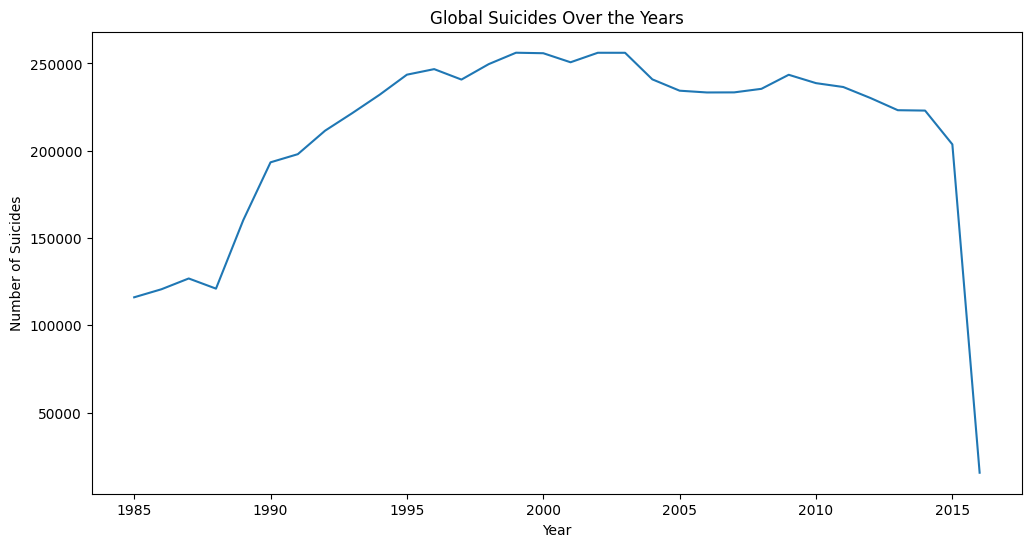

In [ ]:
# Distribution of suicides by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=suicide_data.groupby("year")["suicides_no"].sum())
plt.title("Global Suicides Over the Years")
plt.ylabel("Number of Suicides")
plt.xlabel("Year")
plt.show()

Top 10 Countries by Total Suicides

<ipython-input-7-1e030ae37921>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


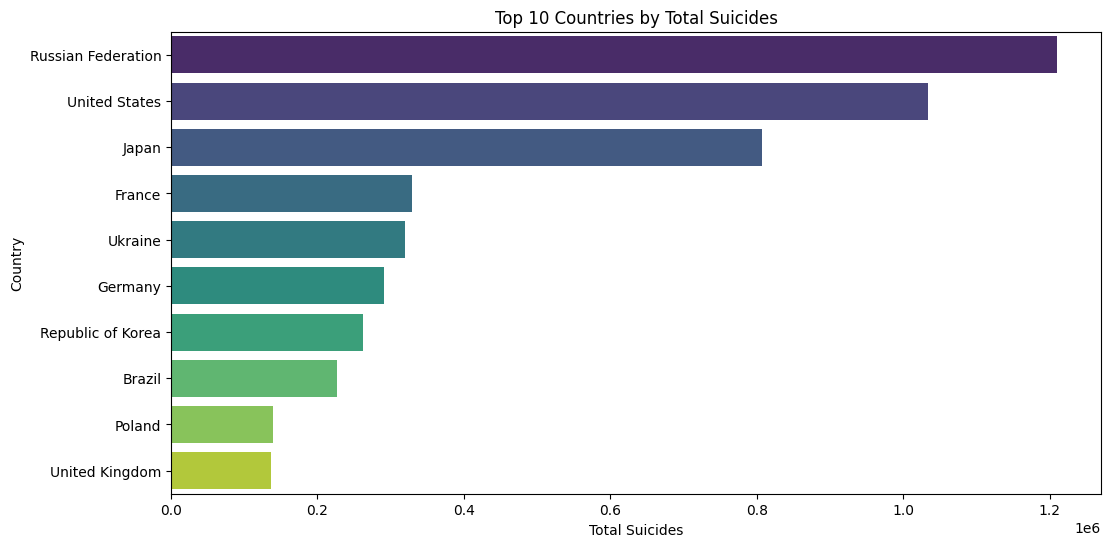

In [ ]:
# Top 10 countries by suicide count
top_countries = suicide_data.groupby("country")["suicides_no"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Total Suicides")
plt.xlabel("Total Suicides")
plt.ylabel("Country")
plt.show()

Total Suicides by Gender

<ipython-input-8-d84b309c7b6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


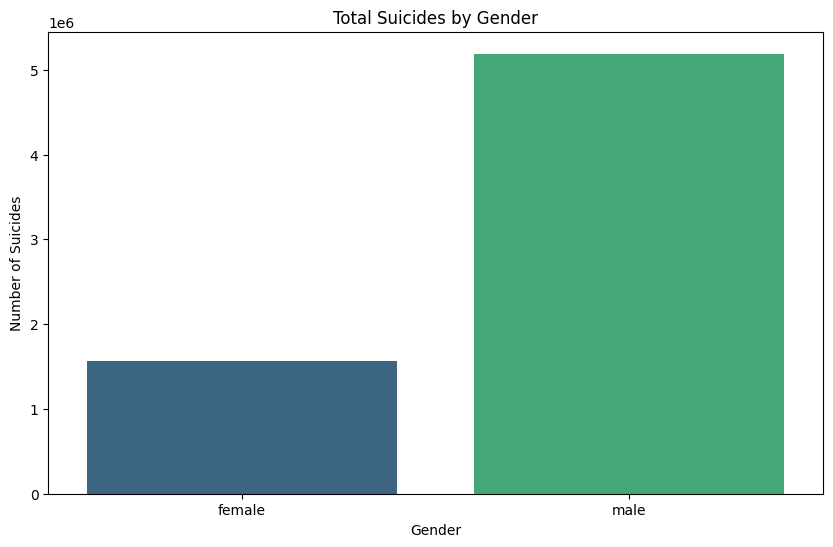

In [ ]:
# Suicides by gender
plt.figure(figsize=(10, 6))
sns.barplot(
    data=suicide_data.groupby("sex")["suicides_no"].sum().reset_index(),
    x="sex",
    y="suicides_no",
    palette="viridis",
)
plt.title("Total Suicides by Gender")
plt.ylabel("Number of Suicides")
plt.xlabel("Gender")
plt.show()

Distribution of Suicides by Age Group

<ipython-input-9-a831d87e9da5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age", y="suicides_no", data=suicide_data, palette="coolwarm")


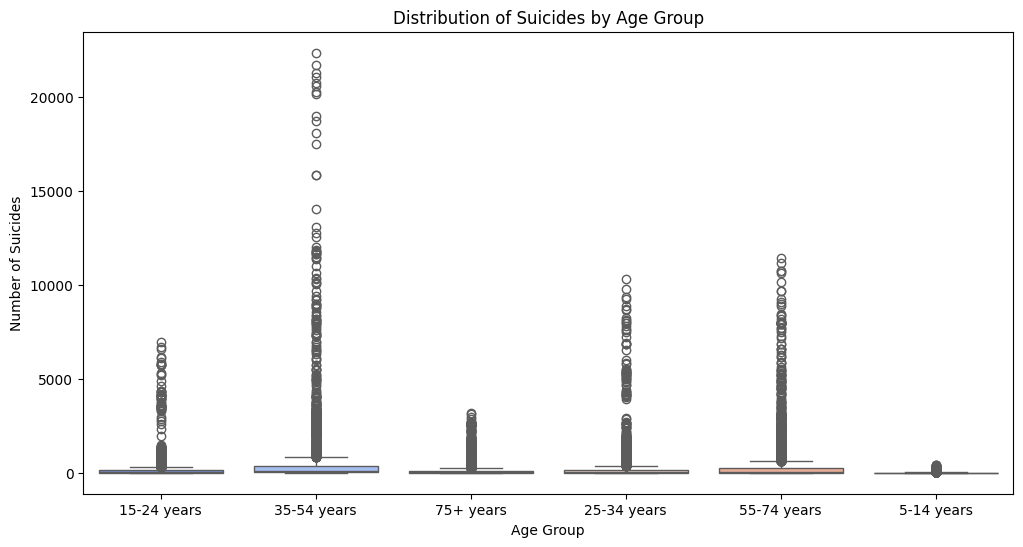

In [ ]:
# Suicide rate by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x="age", y="suicides_no", data=suicide_data, palette="coolwarm")
plt.title("Distribution of Suicides by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Suicides")
plt.show()

Correlation Heatmap

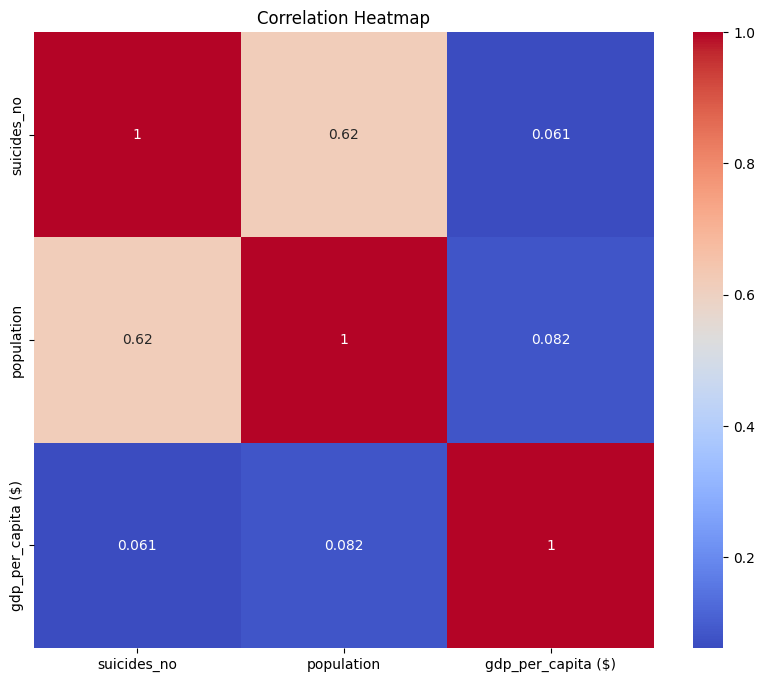

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlations = suicide_data[["suicides_no", "population", "gdp_per_capita ($)"]].corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

GDP per Capita vs Suicides

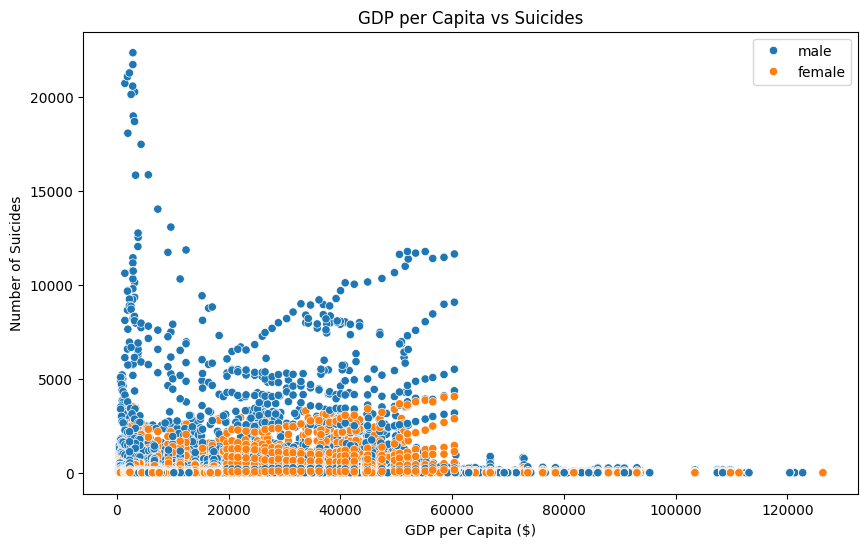

In [ ]:
# Suicides and GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=suicide_data, x="gdp_per_capita ($)", y="suicides_no", hue="sex")
plt.title("GDP per Capita vs Suicides")
plt.ylabel("Number of Suicides")
plt.xlabel("GDP per Capita ($)")
plt.legend()
plt.show()

Trend of Suicides Over the Years by Gender

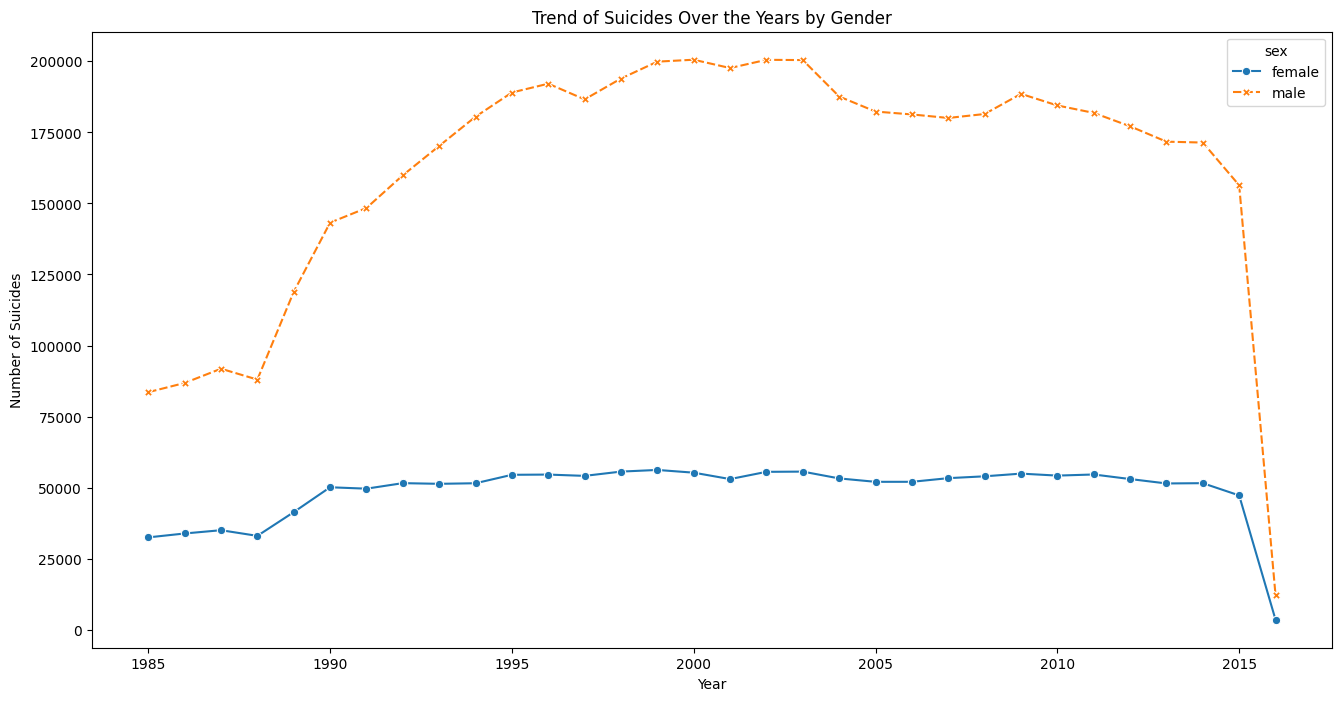

In [ ]:
# Suicides by year, gender, and age
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=suicide_data.groupby(["year", "sex"])["suicides_no"].sum().reset_index(),
    x="year",
    y="suicides_no",
    hue="sex",
    style="sex",
    markers=True,
)
plt.title("Trend of Suicides Over the Years by Gender")
plt.ylabel("Number of Suicides")
plt.xlabel("Year")
plt.show()

**Machine Learning Models**


---

Data Preprocessing

In [5]:
# Check if population contains strings
if suicide_data['population'].dtype == 'object':
    suicide_data['population'] = suicide_data['population'].str.replace(',', '').astype(float)

# Ensure all numeric columns are numeric
numeric_columns = ['suicides_no', 'population']
for col in numeric_columns:
    suicide_data[col] = pd.to_numeric(suicide_data[col], errors='coerce')

# Fill missing values with column medians (for numeric columns)
suicide_data.fillna(suicide_data.median(numeric_only=True), inplace=True)

# Create suicide rate per 100,000 population
suicide_data["suicide_rate"] = (suicide_data["suicides_no"] / suicide_data["population"]) * 100000

# Encode categorical variables using get_dummies
categorical_columns = ["sex", "age", "generation"]
suicide_data = pd.get_dummies(suicide_data, columns=categorical_columns, drop_first=True)

# Drop irrelevant columns
irrelevant_columns = ["country-year", "HDI for year"]
if set(irrelevant_columns).issubset(suicide_data.columns):
    suicide_data.drop(columns=irrelevant_columns, inplace=True)

# Train-test split
from sklearn.model_selection import train_test_split

X = suicide_data.drop(columns=["suicides_no", "suicide_rate"])
y = suicide_data["suicide_rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure everything is correct
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (22256, 17), X_test shape: (5564, 17)
y_train shape: (22256,), y_test shape: (5564,)


Model Training


In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Scaling pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))  # Avoid centering sparse matrices
])

# Apply pipeline to train and test sets
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Models and hyperparameter tuning
models = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "learning_rate": [0.01, 0.1],
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
        },
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0]},
    },
}

results = {}
for name, config in models.items():
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_squared_error")
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    predictions = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = {"MSE": mse, "R2": r2, "MAE": mae}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Metrics:\n", results_df)


Model Performance Metrics:
                         MSE        R2       MAE
Random Forest      0.028185  0.999919  0.008795
Gradient Boosting  0.015547  0.999956  0.026658
Ridge Regression   0.000008  1.000000  0.002330


Model Performance Comparison

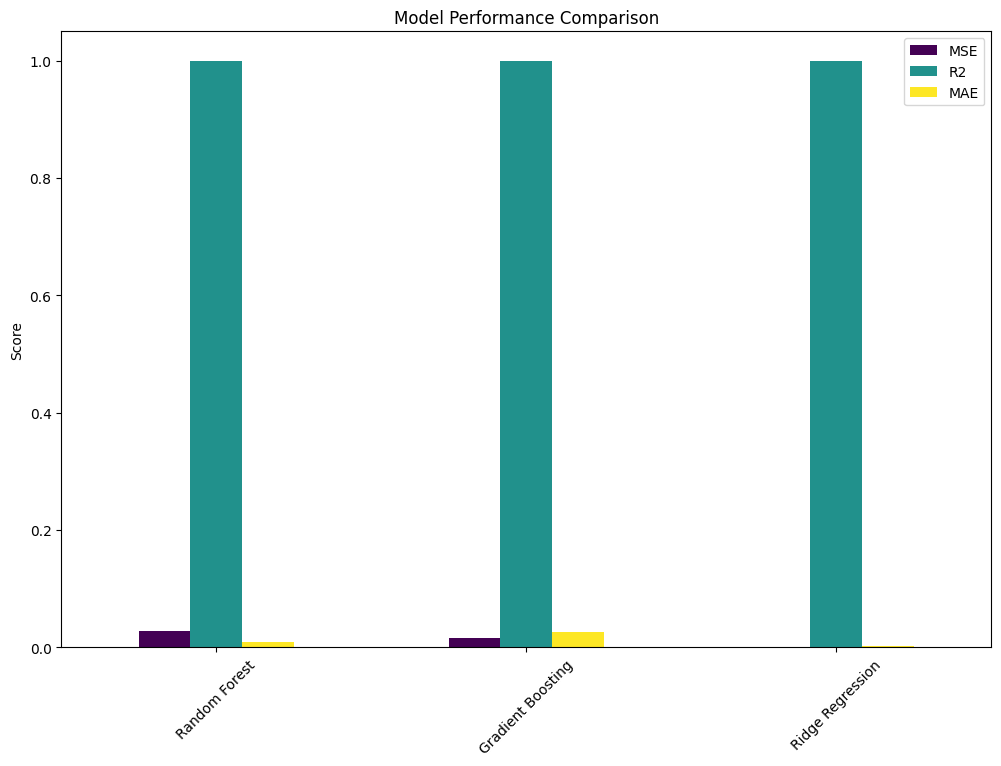

In [9]:
import matplotlib.pyplot as plt

# Visualization of model comparison
results_df[["MSE", "R2", "MAE"]].plot(kind="bar", figsize=(12, 8), cmap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

**Forecasting**

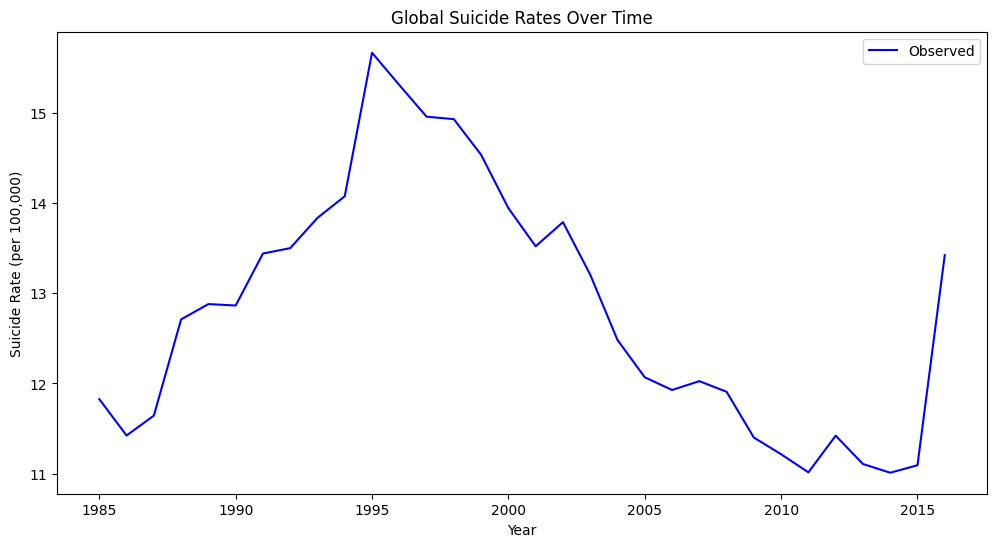

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Aggregate and visualize time series
time_series = suicide_data.groupby("year")["suicide_rate"].mean()

plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Observed", color="blue")
plt.title("Global Suicide Rates Over Time")
plt.ylabel("Suicide Rate (per 100,000)")
plt.xlabel("Year")
plt.legend()
plt.show()

# Train Holt-Winters model
hw_model = ExponentialSmoothing(
    time_series, trend="add", seasonal="add", seasonal_periods=4
).fit()

# Forecast future values
forecast = hw_model.forecast(steps=5)
forecast_years = range(time_series.index[-1] + 1, time_series.index[-1] + 6)


Forecasting Model Evaluations

In [11]:
train, test = time_series[:-5], time_series[-5:]
train_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=4).fit()
predictions = train_model.forecast(steps=5)

mse_forecast = mean_squared_error(test, predictions)
print(f"Forecast MSE: {mse_forecast}")

Forecast MSE: 3.6185088198596427


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Visualization

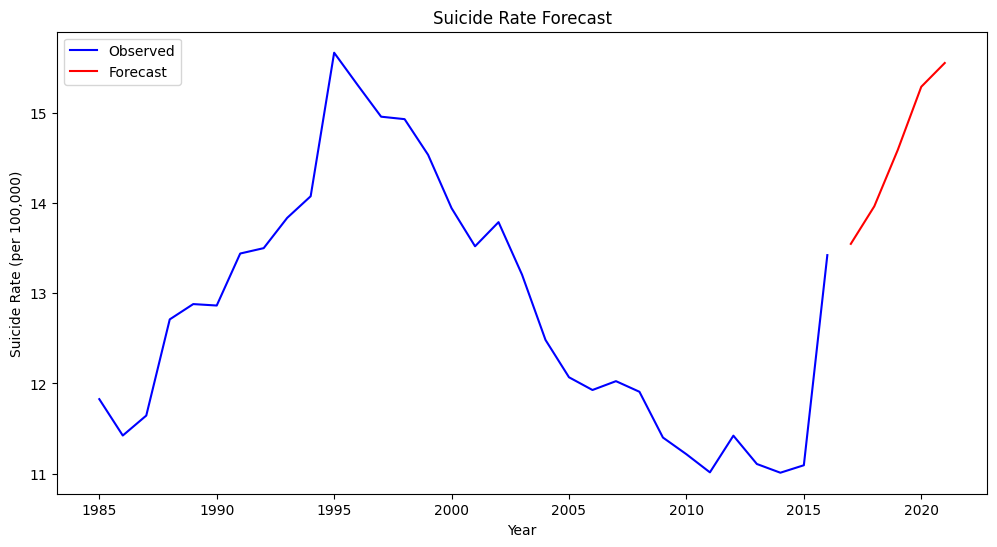

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Observed", color="blue")
plt.plot(forecast_years, forecast, label="Forecast", color="red")
plt.title("Suicide Rate Forecast")
plt.ylabel("Suicide Rate (per 100,000)")
plt.xlabel("Year")
plt.legend()
plt.show()